In [1]:
import os
import requests
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import html
from IPython.core.display import display, HTML

def printhtml(html):
    display(HTML(html))

base_url = "https://s3.nautilus.optiputer.net/braingeneers/archive"

In [8]:
# Set default plot size - must be in separate cell:
# https://github.com/ipython/ipython/issues/11098
plt.rcParams['figure.figsize'] = [15.0, 5.0]

## Baseline

In [2]:
metadata = requests.get("{}/{}".format(base_url, "derived/2019-01-22/metadata.json")).json()
for key, value in metadata.items():
    printhtml("<b>{}: </b>{}".format(html.escape(key), html.escape(value)))
    
with np.DataSource(None).open("{}/{}".format(
    base_url, "derived/2019-01-22/256A2_test_190122_112728.npy"), "rb") as f:
    baseline = np.load(f)
baseline_metadata = requests.get("{}/{}".format(base_url, "derived/2019-01-22/256A2_test_190122_112728.json")).json()

## Signal

In [3]:
metadata = requests.get("{}/{}".format(base_url, "derived/2018-12-14/metadata.json")).json()
for key, value in metadata.items():
    printhtml("<b>{}: </b>{}".format(html.escape(key), html.escape(value)))
    
# There are multiple .npy as the recording was over a long time, use one for now
with np.DataSource(None).open("{}/{}".format(
    base_url, "derived/2018-12-14/R_UCSC355A_64D26_181214_132446.npy"), "rb") as f:
    signal = np.load(f)

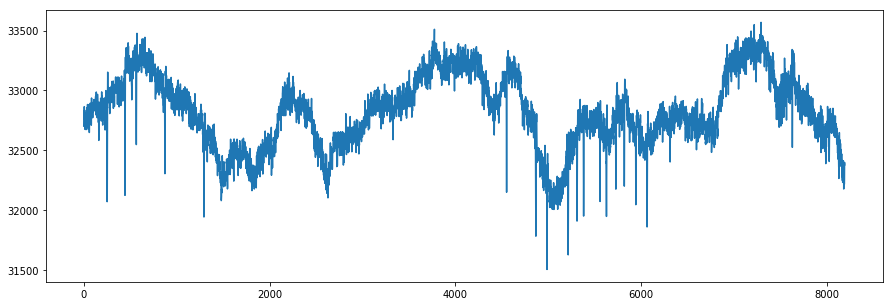

In [10]:
plt.plot(signal[0][0:8192])
plt.show()

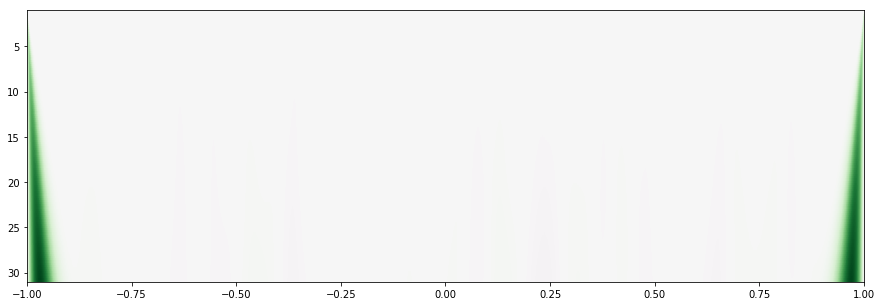

In [12]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + scipy.signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 127)
cwtmatr = scipy.signal.cwt(signal[0][0:8192], scipy.signal.ricker, widths)
# cwtmatr = scipy.signal.cwt(signal[0], scipy.signal.ricker, widths)

plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()